In [112]:
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [113]:
df = pd.read_csv(Path.cwd().parent / "data" / "07_final_dataset.csv")
to_drop = [col for col in df.columns if "Unnamed" in col.split(":")]
df = df.drop(columns=to_drop)
df

,artist_name,artist_popularity,artist_followers,track_popularity,track_danceability,track_energy,track_loudness,track_tempo,track_duration_ms,is_explicit_content,...,house,metal,soul,r&b,electro,hip hop,funk,folk,disco,other_genre
0,736,86,2352780,90,0.761,0.525,-6.900,80.870,238805,False,...,0,0,0,0,0,0,0,0,0,1
1,1851,90,3212078,97,0.591,0.764,-5.484,169.928,141806,True,...,0,0,0,0,0,0,0,0,0,1
2,604,90,8574878,96,0.796,0.798,-6.312,116.032,202735,False,...,0,0,0,0,0,0,0,0,0,1
3,51,94,33127866,97,0.604,0.366,-7.519,141.981,224695,False,...,0,0,0,0,0,0,0,0,0,0
4,1893,100,40894024,92,0.735,0.795,-6.523,122.000,188918,True,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4623,798,28,12620,32,0.405,0.931,-4.213,129.982,353646,False,...,0,0,0,0,0,0,0,0,0,1
4624,482,45,173641,36,0.160,0.949,-4.002,109.021,221427,False,...,0,1,0,0,0,0,0,0,0,0
4625,1975,47,130818,33,0.125,0.793,-4.246,177.974,376133,False,...,0,0,0,0,0,0,0,0,0,1
4626,614,45,120862,35,0.189,0.995,-7.070,81.580,261920,False,...,0,1,0,0,0,0,0,0,0,0


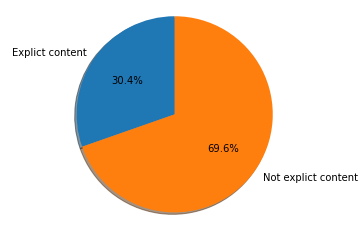

In [114]:
labels = 'Explict content', 'Not explict content'
explicit_content = df[df.is_explicit_content == True].shape[0]
not_explicit_content = df[df.is_explicit_content == False].shape[0]

sizes = [explicit_content, not_explicit_content]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

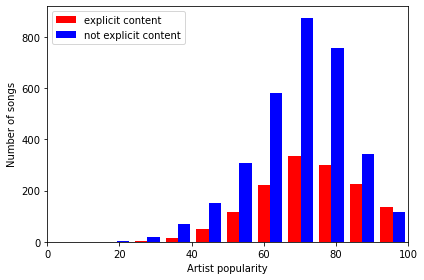

In [115]:
explicit_content_df = df[df.is_explicit_content == True]
x = explicit_content_df.artist_popularity

not_explicit_content_df = df[df.is_explicit_content == False]
y = not_explicit_content_df.artist_popularity

colors = ['r','b']

fig, ax1 = plt.subplots()
ax1.hist([x,y],color=colors,label=['explicit content', 'not explicit content'])
plt.legend(loc='upper left')
ax1.set_xlim(0,100)
ax1.set_ylabel("Number of songs")
ax1.set_xlabel("Artist popularity")
plt.tight_layout()
plt.show()

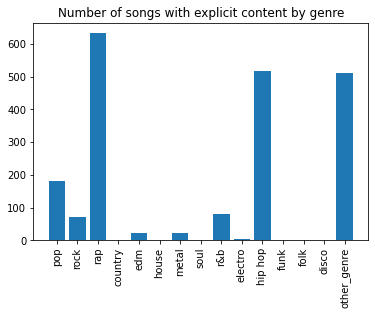

In [116]:
pop = df.loc[(df["pop"] == 1) & (df["is_explicit_content"] == True)].shape[0]
rock = df.loc[(df["rock"] == 1) & (df["is_explicit_content"] == True)].shape[0]
rap = df.loc[(df["rap"] == 1) & (df["is_explicit_content"] == True)].shape[0]
country = df.loc[(df["country"] == 1) & (df["is_explicit_content"] == True)].shape[0]
edm = df.loc[(df["edm"] == 1) & (df["is_explicit_content"] == True)].shape[0]
house = df.loc[(df["house"] == 1) & (df["is_explicit_content"] == True)].shape[0]
metal = df.loc[(df["metal"] == 1) & (df["is_explicit_content"] == True)].shape[0]
soul = df.loc[(df["soul"] == 1) & (df["is_explicit_content"] == True)].shape[0]
r_b = df.loc[(df["r&b"] == 1) & (df["is_explicit_content"] == True)].shape[0]
electro = df.loc[(df["electro"] == 1) & (df["is_explicit_content"] == True)].shape[0]
hip_hop = df.loc[(df["hip hop"] == 1) & (df["is_explicit_content"] == True)].shape[0]
funk = df.loc[(df["funk"] == 1) & (df["is_explicit_content"] == True)].shape[0]
folk = df.loc[(df["folk"] == 1) & (df["is_explicit_content"] == True)].shape[0]
disco = df.loc[(df["disco"] == 1) & (df["is_explicit_content"] == True)].shape[0]
other_genre = df.loc[(df["other_genre"] == 1) & (df["is_explicit_content"] == True)].shape[0]


genres_count = [pop, rock, rap, country, edm, house, metal, soul, r_b, electro,
          hip_hop, funk, folk, disco, other_genre]

genre_labels = ['pop', 'rock','rap', 'country', 'edm', 'house', 'metal', 'soul', 'r&b', 'electro',
                'hip hop', 'funk', 'folk', 'disco', 'other_genre']


plt.title("Number of songs with explicit content by genre")
plt.bar(genre_labels,genres_count)
plt.xticks(genre_labels,rotation='vertical')
plt.show()

In [117]:
grouped_df = df[["artist_name" ,"is_explicit_content"]]
grouped_df = grouped_df.groupby('artist_name')
explicit_content_by_artist = grouped_df.sum()
explicit_content_by_artist.sort_values(by=["is_explicit_content"],ascending=False).head(10)

,is_explicit_content
artist_name,
608,79
827,21
1558,12
550,11
12,11
1322,11
432,11
20,10
1125,10


In [136]:
# usa = 1 else = 0

df.loc[df["country_code"] == "840", "country_code"] = 1
df.loc[df["country_code"] != "840", "country_code"] = 0


usa_explicite = df.loc[(df["is_explicit_content"] == True) &
                            (df["country_code"] == 1)].shape[0]
usa_not_explicite = df.loc[(df["is_explicit_content"] == False) &
                                (df["country_code"] == 1)].shape[0]

else_explicite = df.loc[(df["is_explicit_content"] == True) &
                                (df["country_code"] == 0)].shape[0]
else_not_explicite = df.loc[(df["is_explicit_content"] == False) &
                                    (df["country_code"] == 0)].shape[0]

df["country_code"].sum()

0

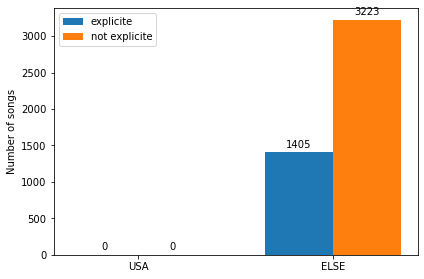

In [137]:
labels = ['USA', 'ELSE']
explicite = [usa_explicite, else_explicite]
not_explicite = [usa_not_explicite, else_not_explicite]

x = np.arange(len(labels)) 
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, explicite, width, label='explicite')
rects2 = ax.bar(x + width/2, not_explicite, width, label='not explicite')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of songs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()